# FlyBrainLab Tutorial
## Olfactory Sensory Neurons: Electrophysiology and Morphology
In this tutorial notebook we visualize the morphology of a number of olfactory sensory neurons, and load corresponding electrophysiology recordings.

### Step 1:  Setup
After generating an FBL workspace for Hemibrain, open this notebook and change its kernel to the kernel of the workspace.
### Step 2: Electrophysiology
Let us download and read the electrophysiology data:

In [4]:
import warnings
warnings.filterwarnings("ignore")
fbl.urlRetriever("https://data.flybrainlab.fruitflybrain.org/antenna/osn_recordings.h5","osn_recordings.h5")

Now, let us parse this data. The example below can be customized to read the rest of the h5 file as well:

In [5]:
import h5py
import numpy as np
filename = "osn_recordings.h5" # file to load
X = [] # save stimulus
Y = [] # save OSN psth
Xt = [] # save stimulus time
Yt = [] # save OSN psth time
with h5py.File(filename, "r") as f:
    print("All Recording Supersets: %s" % f.keys())
    for outer_key in ['elife15']:
        for key in f[outer_key].keys():
            print('Name of Recording Set:', key)
            print('All Attributes:', f[outer_key][key].attrs.keys())
            print('Odorant:', f[outer_key][key].attrs['odorant'])
            print('Receptor:',f[outer_key][key].attrs['receptor'])
            X.append(f[outer_key][key]['stimulus']['y'].value)
            Y.append(f[outer_key][key]['psth']['y'].value)
            Xt.append(f[outer_key][key]['stimulus']['x'].value)
            Yt.append(f[outer_key][key]['psth']['x'].value)

All Recording Supersets: <KeysViewHDF5 ['elife15', 'multiple_pairs', 'staircase', 'triangular', 'two_odorants', 'white_noise']>
Name of Recording Set: parabola
All Attributes: <KeysViewHDF5 ['odorant', 'receptor']>
Odorant: acetone
Receptor: or59b
Name of Recording Set: ramp
All Attributes: <KeysViewHDF5 ['odorant', 'receptor']>
Odorant: acetone
Receptor: or59b
Name of Recording Set: step
All Attributes: <KeysViewHDF5 ['odorant', 'receptor']>
Odorant: acetone
Receptor: or59b


We can observe that the odorant being delivered is acetone. Let us plot the data:

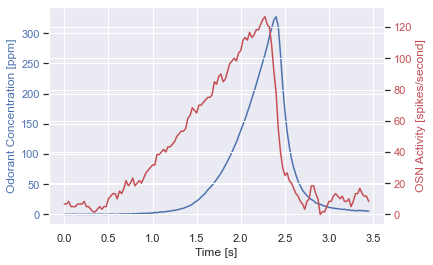

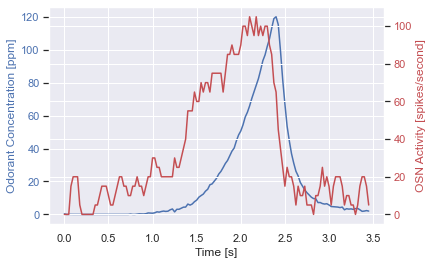

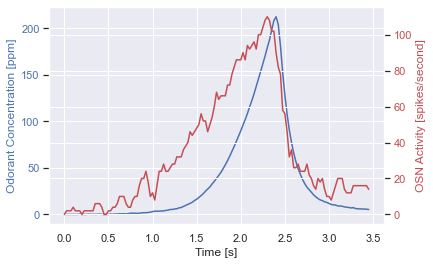

In [6]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline
stimulus_type = 0 # 0:

for i in range(X[stimulus_type].shape[0]): # loop through recordings
    f = interp1d(Xt[0], X[stimulus_type][i,:], kind='linear') # Interpolator for different time axes
    fY = f(Yt[0])
    # plt.plot(Yt[0], fY) # Note that we subsample stimulus waveform here
    # plt.plot(Yt[0], Y[stimulus_type][i,:])
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(Yt[0], fY, 'b-')
    ax1.set_ylabel('Odorant Concentration [ppm]', color='b')
    for tl in ax1.get_yticklabels():
        tl.set_color('b')
        
    ax2 = ax1.twinx()
    ax2.plot(Yt[0], Y[stimulus_type][i,:], 'r-')
    ax2.set_ylabel('OSN Activity [spikes/second]', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    ax1.set_xlabel('Time [s]')

### Step 3: Morphology
Let us now use a number of queries to load the corresponding morphology data in the Hemibrain dataset. Note that you can use the write query box to write the queries as well!

In [7]:
client = fbl.get_client() # Get the first client in the workspace

The recordings we just loaded were from OSNs expressing the Or59b receptor. Let us add OSNs expressing this receptor (which are named ab2a):

In [8]:
_ = client.executeNLPquery('show $ab2A$')

[FFBOLab Client NLP 2020-07-20 01:11:50] NLP successfully parsed query.
[FFBOLab Client NLP 2020-07-20 01:11:51] Received a message.
[FFBOLab Client NLP 2020-07-20 01:11:51] Received a command.
[FFBOLab Client NLP 2020-07-20 01:11:52] Received data.
[FFBOLab Client NLP 2020-07-20 01:11:52] Received data.
[FFBOLab Client NLP 2020-07-20 01:11:53] Received data.
[FFBOLab Client NLP 2020-07-20 01:11:53] Received a message.
[FFBOLab Client NLP 2020-07-20 01:11:53] Received data.
[]


These OSNs project to the DM4 glomerulus. Let us now add DM4 uniglomerular projection neurons (uPNs) to our workspace:

In [9]:
_ = client.executeNLPquery('add $_DM4$')

[FFBOLab Client NLP 2020-07-20 01:11:57] NLP successfully parsed query.
[FFBOLab Client NLP 2020-07-20 01:11:58] Received a message.
[FFBOLab Client NLP 2020-07-20 01:11:58] Received data.
[FFBOLab Client NLP 2020-07-20 01:11:58] Received a message.
[FFBOLab Client NLP 2020-07-20 01:11:58] Received data.
[]


Let us color the DM4 PNs white:

In [10]:
_ = client.executeNLPquery('color $_DM4$ white')

[FFBOLab Client NLP 2020-07-20 01:12:01] NLP successfully parsed query.
[FFBOLab Client NLP 2020-07-20 01:12:01] Received a message.
[FFBOLab Client NLP 2020-07-20 01:12:01] Received a command.
[FFBOLab Client NLP 2020-07-20 01:12:01] Received a message.
[FFBOLab Client NLP 2020-07-20 01:12:01] Received data.
[]


And the OSNs cyan:

In [11]:
_ = client.executeNLPquery('color $ab2A$ cyan')

[FFBOLab Client NLP 2020-07-20 01:12:03] NLP successfully parsed query.
[FFBOLab Client NLP 2020-07-20 01:12:03] Received a message.
[FFBOLab Client NLP 2020-07-20 01:12:03] Received a command.
[FFBOLab Client NLP 2020-07-20 01:12:03] Received a message.
[FFBOLab Client NLP 2020-07-20 01:12:03] Received data.
[]


And we are done! Try to make some changes to the codebase to get a better idea about how to use FlyBrainLab.

# Appendix
The .h5 file we have used has a different structure for different recording types. We give methods to load some more keys below:

In [12]:
import h5py
import numpy as np
import warnings
warnings.filterwarnings("ignore")
filename = "osn_recordings.h5" # file to load
X = [] # save stimulus
Y = [] # save OSN psth
Xt = [] # save stimulus time
Yt = [] # save OSN psth time
with h5py.File(filename, "r") as f:
    print("All Recording Supersets: %s" % f.keys())
    for outer_key in ['staircase']:
        for key in f[outer_key].keys():
            print('Name of Recording Set:', key)
            print('All Attributes:', f[outer_key][key].attrs.keys())
            print('Odorant:', f[outer_key].attrs['odorant'])
            print('Receptor:',f[outer_key].attrs['receptor'])
            print(f[outer_key][key].keys())
            if key == 'stimulus':
                X.append(f[outer_key][key]['y'].value)
                Xt.append(f[outer_key][key]['x'].value)
            else:
                Y.append(f[outer_key][key]['y'].value)
                Yt.append(f[outer_key][key]['x'].value)

All Recording Supersets: <KeysViewHDF5 ['elife15', 'multiple_pairs', 'staircase', 'triangular', 'two_odorants', 'white_noise']>
Name of Recording Set: psth
All Attributes: <KeysViewHDF5 []>
Odorant: acetone
Receptor: or59b
<KeysViewHDF5 ['x', 'y']>
Name of Recording Set: stimulus
All Attributes: <KeysViewHDF5 []>
Odorant: acetone
Receptor: or59b
<KeysViewHDF5 ['x', 'y']>


In [13]:
import h5py
import numpy as np
import warnings
warnings.filterwarnings("ignore")
filename = "osn_recordings.h5" # file to load
X = [] # save stimulus
Y = [] # save OSN psth
Xt = [] # save stimulus time
Yt = [] # save OSN psth time
with h5py.File(filename, "r") as f:
    print("All Recording Supersets: %s" % f.keys())
    for outer_key in ['white_noise']:
        print(outer_key)
        X.append(f[outer_key]['stimulus']['y'].value)
        Y.append(f[outer_key]['psth']['y'].value)
        Xt.append(f[outer_key]['stimulus']['x'].value)
        Yt.append(f[outer_key]['psth']['x'].value)

All Recording Supersets: <KeysViewHDF5 ['elife15', 'multiple_pairs', 'staircase', 'triangular', 'two_odorants', 'white_noise']>
white_noise


In [14]:
import h5py
import numpy as np
import warnings
warnings.filterwarnings("ignore")
filename = "osn_recordings.h5" # file to load
X = [] # save stimulus
Y = [] # save OSN psth
Xt = [] # save stimulus time
Yt = [] # save OSN psth time
with h5py.File(filename, "r") as f:
    print("All Recording Supersets: %s" % f.keys())
    for outer_key in ['multiple_pairs']:
        for key in f[outer_key].keys():
            print('Name of Recording Set:', key)
            print('All Attributes:', f[outer_key][key].attrs.keys())
            print('Odorant:', f[outer_key][key].attrs['odorant'])
            print('Receptor:',f[outer_key][key].attrs['receptor'])
            print('Stimulus Type:', f[outer_key][key].keys())
            for stimulus_type in f[outer_key][key].keys():
                X.append(f[outer_key][key][stimulus_type]['stimulus']['y'].value)
                Y.append(f[outer_key][key][stimulus_type]['psth']['y'].value)
                Xt.append(f[outer_key][key][stimulus_type]['stimulus']['x'].value)
                Yt.append(f[outer_key][key][stimulus_type]['psth']['x'].value)

All Recording Supersets: <KeysViewHDF5 ['elife15', 'multiple_pairs', 'staircase', 'triangular', 'two_odorants', 'white_noise']>
Name of Recording Set: 0
All Attributes: <KeysViewHDF5 ['odorant', 'receptor']>
Odorant: acetone
Receptor: or59b
Stimulus Type: <KeysViewHDF5 ['parabola', 'ramp', 'step']>
Name of Recording Set: 1
All Attributes: <KeysViewHDF5 ['odorant', 'receptor']>
Odorant: butyraldehyde
Receptor: or7a
Stimulus Type: <KeysViewHDF5 ['parabola', 'ramp', 'step']>
Name of Recording Set: 2
All Attributes: <KeysViewHDF5 ['odorant', 'receptor']>
Odorant: butyraldehyde
Receptor: or7a
Stimulus Type: <KeysViewHDF5 ['parabola', 'ramp', 'step']>
